In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pearson_util 
import descartes
import pygeoj
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors


In [2]:
gdf_dw = gpd.read_file('C:/Users/seanp/python/NUTS_RG_60M_2016_3035_LEVL_3.geojson')
gdf_dw.iloc[1318:1522]

,id,COAST_TYPE,MOUNT_TYPE,NAME_LATN,CNTR_CODE,FID,NUTS_ID,NUTS_NAME,LEVL_CODE,URBN_TYPE,geometry
1318,RO414,3,4,Olt,RO,RO414,RO414,Olt,3,3,"POLYGON ((5500624.645 2481498.725, 5496185.887..."
1319,RO415,3,2,Vâlcea,RO,RO415,RO415,Vâlcea,3,3,"POLYGON ((5457799.893 2527102.235, 5447340.912..."
1320,UKH25,3,4,Central Bedfordshire,UK,UKH25,UKH25,Central Bedfordshire,3,1,"POLYGON ((3627278.940 3267434.368, 3608276.298..."
1321,UKH31,1,4,Southend-on-Sea,UK,UKH31,UKH31,Southend-on-Sea,3,1,"POLYGON ((3681173.766 3201641.834, 3684013.709..."
1322,UKH32,1,4,Thurrock,UK,UKH32,UKH32,Thurrock,3,1,"POLYGON ((3664855.621 3200561.199, 3654719.164..."
...,...,...,...,...,...,...,...,...,...,...,...
1517,UKH16,1,4,North and West Norfolk,UK,UKH16,UKH16,North and West Norfolk,3,3,"POLYGON ((3760200.001 3324800.736, 3715302.262..."
1518,UKH17,2,4,Breckland and South Norfolk,UK,UKH17,UKH17,Breckland and South Norfolk,3,3,"POLYGON ((3754275.042 3301188.055, 3706277.604..."
1519,UKH21,2,4,Luton,UK,UKH21,UKH21,Luton,3,1,"POLYGON ((3608276.298 3251322.689, 3605470.224..."
1520,UKH23,2,4,Hertfordshire,UK,UKH23,UKH23,Hertfordshire,3,1,"POLYGON ((3641428.795 3257056.214, 3631036.624..."


In [3]:
gdf = gpd.read_file('https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson/NUTS_RG_60M_2016_3035_LEVL_3.geojson')

# Creating dataframes of average national annual road freight transport by regions (NUTS 3) and by group of goods (1 000 t)

In [4]:
#National annual road freight transport by regions of unloading (NUTS 3) and by group of goods (1 000 t), from 2008 onwards (road_go_na_ru3g)
df_unloading = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_na_ru3g.tsv.gz',['subsector', 'unit', 'region'])

In [5]:
df_unloading_total = df_unloading.loc['TOTAL']

In [6]:
df_unloading_total = df_unloading_total.droplevel(0)

In [7]:
#sets index of the df to the same index the gdf has and thereby delets all rowes which have a different id (old NUTS 3 data)
df_unloading_nuts3 = df_unloading_total.reindex(gdf.set_index('id').index)

In [8]:
#filters the countries that have no data
no_data_nuts3 = df_unloading_nuts3[df_unloading_nuts3.isna().all(axis=1)].sort_index().index

In [9]:
#National annual road freight transport by regions of loading (NUTS 3) and by group of goods (1 000 t), from 2008 onwards (road_go_na_rl3g
df_loading = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_na_rl3g.tsv.gz',['subsector', 'unit', 'region'])

In [10]:
df_loading_total = df_loading.loc['TOTAL']

In [11]:
df_loading_total = df_loading_total.droplevel(0)

In [12]:
#sets index of the df to the same index the gdf has and thereby delets all rowes which have a different id (old NUTS 3 data)
df_loading_nuts3 = df_loading_total.reindex(gdf.set_index('id').index)

In [13]:
no_data_nuts3 = df_unloading_nuts3[df_unloading_nuts3.isna().all(axis=1)].sort_index().index

In [14]:
df_loading_nuts3.head()

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,,,,,,,,,,,,
CZ052,31164.0,23410.0,22302.0,22533.0,20556.0,16265.0,15133.0,14044.0,17536.0,12320.0,16522.0,17859.0
CZ053,27127.0,20301.0,20399.0,21064.0,19896.0,16948.0,15222.0,12602.0,14166.0,14423.0,16343.0,20090.0
CZ063,22196.0,26155.0,18682.0,20785.0,19078.0,15516.0,12487.0,9854.0,13296.0,14551.0,18543.0,20061.0
CZ064,49041.0,47453.0,43448.0,38848.0,40457.0,35683.0,29350.0,25806.0,26051.0,27880.0,31335.0,40006.0
CZ071,37656.0,34631.0,29204.0,26120.0,25596.0,26760.0,18776.0,23872.0,21159.0,19474.0,25554.0,25133.0


In [15]:
#Concatinates df --> takes 2 df and joins them together
df_average_transport_total = pd.concat((df_unloading_nuts3, df_loading_nuts3))

In [16]:
#takes lines with same index and calculates mean of them
df_average_transport_total = df_average_transport_total.groupby(df_average_transport_total.index).mean()

In [17]:
#sets the index 'country' and takes it from the cntr_code column of the gdf
df_average_transport_total = df_average_transport_total.set_index(gdf.set_index('CNTR_CODE').index.rename('country'), append=True)

In [18]:
df_average_transport_total.tail()

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
UKN12,UK,3002.0,3325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,UK,5311.5,3286.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,UK,4799.5,2361.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN15,UK,4986.5,3731.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN16,UK,4350.5,4223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Compacted

In [19]:
#unloading
df_unloading_GT01 = df_unloading.loc['GT01']
df_unloading_GT01 = df_unloading_GT01.droplevel(0)
df_unloading_GT01_nuts3 = df_unloading_GT01.reindex(gdf.set_index('id').index)
#loading
df_loading_GT01 = df_loading.loc['GT01']
df_loading_GT01 = df_loading_GT01.droplevel(0)
df_loading_GT01_nuts3 = df_loading_GT01.reindex(gdf.set_index('id').index)
#combining
df_average_transport_GT01 = pd.concat((df_unloading_GT01_nuts3, df_loading_GT01_nuts3))
df_average_transport_GT01 = df_average_transport_GT01.groupby(df_average_transport_GT01.index).mean()
df_average_transport_GT01 = df_average_transport_GT01.set_index(gdf.set_index('CNTR_CODE').index.rename('country'), append=True)
#share
df_transport_share_GT01 = df_average_transport_GT01.div(df_average_transport_total)
df_transport_share_GT01.tail()

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
UKN12,UK,0.147568,0.065865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,UK,0.040102,0.067701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,UK,0.030420,0.016727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN15,UK,0.150607,0.081211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN16,UK,0.092058,0.085958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#unloading
df_unloading_GT02 = df_unloading.loc['GT02']
df_unloading_GT02 = df_unloading_GT02.droplevel(0)
df_unloading_GT02_nuts3 = df_unloading_GT02.reindex(gdf.set_index('id').index)
#loading
df_loading_GT02 = df_loading.loc['GT02']
df_loading_GT02 = df_loading_GT02.droplevel(0)
df_loading_GT02_nuts3 = df_loading_GT02.reindex(gdf.set_index('id').index)
#combining
df_average_transport_GT02 = pd.concat((df_unloading_GT02_nuts3, df_loading_GT02_nuts3))
df_average_transport_GT02 = df_average_transport_GT02.groupby(df_average_transport_GT02.index).mean()
df_average_transport_GT02 = df_average_transport_GT02.set_index(gdf.set_index('CNTR_CODE').index.rename('country'), append=True)
#share
df_transport_share_GT02 = df_average_transport_GT02.div(df_average_transport_total)
df_transport_share_GT02.tail()

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
UKN12,UK,0.013824,0.006316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,UK,NaN,0.010650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN15,UK,0.002607,0.006433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN16,UK,0.030341,0.002842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Multiply shares of transported good types with transportdistance and amount of these good types = amount of specific good types transported for specific distance in each NUTS 3 region

In [21]:
df_transportdistance = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_na_dctg.tsv.gz',['Type_of_carriage', 'Distance','Subsector', 'Unit', 'Country'])

In [22]:
df_transportdistance

2019       2018   \
Type_of_carriage Distance  Subsector Unit  Country                         
HIRE             KM150-499 GT01      THS_T AT          1904.0     2007.0   
                                           BE          4249.0     3975.0   
                                           BG          1581.0     1850.0   
                                           CH          1355.0     1009.0   
                                           CY             NaN        NaN   
...                                                       ...        ...   
TOT              TOTAL     TOTAL     THS_T SE        444460.0   475457.0   
                                           SI         54439.0    50164.0   
                                           SK        142892.0   128855.0   
                                           UK       1453669.0  1408269.0   
                           UNK       THS_T UK             NaN        NaN   

                                                        2017       2016   \
Type_of_carriage Distance  Subsector Unit  Country                         
HIRE             KM150-499 GT01      THS_T AT          2275.0     2138.0   
                                           BE          3238.0     3754.0   
                                           BG          1921.0     1767.0   
                                           CH           949.0     1027.0   
                                           CY             NaN        NaN   
...                                                       ...        ...   
TOT              TOTAL     TOTAL     THS_T SE        449691.0   426715.0   
                                           SI         54027.0    46096.0   
                                           SK        128789.0   105812.0   
                                           UK       1402948.0  1435273.0   
                           UNK       THS_T UK             NaN        1.0   

                                                        2015       2014   \
Type_of_carriage Distance  Subsector Unit  Country                         
HIRE             KM150-499 GT01      THS_T AT          2131.0     1759.0   
                                           BE          4607.0     2015.0   
                                           BG          2249.0     2017.0   
                                           CH          1447.0     1117.0   
                                           CY             1.0        NaN   
...                                                       ...        ...   
TOT              TOTAL     TOTAL     THS_T SE        416940.0   375707.0   
                                           SI         43530.0    50698.0   
                                           SK        100698.0   101173.0   
                                           UK       1450651.0  1329869.0   
                           UNK       THS_T UK             NaN        NaN   

                                                        2013       2012   \
Type_of_carriage Distance  Subsector Unit  Country                         
HIRE             KM150-499 GT01      THS_T AT          1689.0     2037.0   
                                           BE          1766.0     2039.0   
                                           BG          1858.0     1479.0   
                                           CH          1412.0      825.0   
                                           CY             NaN        NaN   
...                                                       ...        ...   
TOT              TOTAL     TOTAL     THS_T SE        276659.0   290008.0   
                                           SI         42608.0    40847.0   
                                           SK         92402.0    94709.0   
                                           UK       1328683.0  1445128.0   
                           UNK       THS_T UK             NaN        NaN   

                                                        2011       2010   \
Type_of_carriage Distanc

In [23]:
#distance is not selected yet. 'TOT' is all distance classes
df_transportdistance = df_transportdistance.loc[('TOT', 'TOTAL', 'GT01')]
df_transportdistance = df_transportdistance.droplevel(0)
df_transportdistance

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
Country,,,,,,,,,,,,
AT,20123.0,20403.0,21207.0,20101.0,18420.0,17585.0,16393.0,17401.0,16792.0,16982.0,16158.0,16370.0
BE,15288.0,14830.0,17183.0,15166.0,22226.0,15810.0,13565.0,15258.0,12517.0,12269.0,12766.0,12279.0
BG,18391.0,16911.0,20428.0,13730.0,15953.0,15894.0,17106.0,13491.0,12620.0,11862.0,9458.0,9437.0
CH,20354.0,18403.0,18184.0,21628.0,20123.0,17602.0,19401.0,16091.0,14448.0,17053.0,14878.0,17348.0
CY,1997.0,2448.0,2290.0,1706.0,1570.0,1103.0,1530.0,2401.0,1451.0,1724.0,2016.0,1689.0
CZ,48847.0,43147.0,44013.0,43167.0,43299.0,42064.0,42518.0,38820.0,37777.0,36917.0,37724.0,42282.0
DE,160035.0,159232.0,160675.0,154649.0,163074.0,166528.0,142776.0,153366.0,153241.0,145574.0,135254.0,139583.0
DK,29243.0,28607.0,27276.0,25282.0,26735.0,24098.0,22827.0,27611.0,29493.0,23662.0,19153.0,22636.0
EE,4787.0,4034.0,4478.0,3625.0,3321.0,4194.0,3868.0,4075.0,3926.0,3906.0,3154.0,2992.0


In [24]:
#mulitply transport_share_goodstype with transportamount and can be selected by distance
df_transportdistance_share_GT01 = df_transport_share_GT01.multiply(df_transportdistance, level = 'country')
df_transportdistance_share_GT01

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
AL011,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL012,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL013,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL014,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL015,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKN12,UK,13544.112592,7386.260752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN13,UK,3680.611127,7592.215883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKN14,UK,2791.993333,1875.777472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Adding column to gdf

In [25]:
df_transportdistance_share_GT01.columns = ['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008']

In [26]:
#droping country index
df_tds_GT01 = df_transportdistance_share_GT01.droplevel(1)

In [27]:
#set the id column as an index so pandas will align the id of the gdf with the id of the df
gdf_dw = gdf_dw.set_index('id')

In [28]:
#add the data from the df to the gdf
gdf1 = gdf_dw.join(df_tds_GT01)
gdf_select = gdf1.drop(['ES708', 'ES704', 'ES705', 'ES709', 'ES706', 'ES703', 'ES707', 'CY000'])
gdf_select

,COAST_TYPE,MOUNT_TYPE,NAME_LATN,CNTR_CODE,FID,NUTS_ID,NUTS_NAME,LEVL_CODE,URBN_TYPE,geometry,...,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,,,,,,,,,,,,,,,,,,,,,
CZ052,3,4,Královéhradecký kraj,CZ,CZ052,CZ052,Královéhradecký kraj,3,2,"POLYGON ((4752267.584 3079151.392, 4768791.122...",...,3263.339621,3095.369998,3783.604882,2235.072556,2719.841265,3213.315528,2091.392800,2254.284522,1752.981267,1704.001072
CZ053,3,4,Pardubický kraj,CZ,CZ053,CZ053,Pardubický kraj,3,3,"POLYGON ((4812156.935 2965655.696, 4782782.205...",...,2031.615012,1408.292667,3257.964843,2331.778180,1831.497854,2074.445967,1965.831821,2192.207361,1155.973284,2211.510704
CZ063,3,4,Kraj Vysočina,CZ,CZ063,CZ063,Kraj Vysočina,3,3,"POLYGON ((4782782.205 2960974.984, 4775981.726...",...,3837.765623,2614.852145,5538.336362,3402.827541,4437.694344,3086.849022,3019.995310,2052.151516,3053.924397,2566.291431
CZ064,3,4,Jihomoravský kraj,CZ,CZ064,CZ064,Jihomoravský kraj,3,2,"POLYGON ((4841157.679 2932184.124, 4851727.509...",...,2027.497265,1826.205490,2278.543931,1949.947154,1684.191348,2474.858123,1797.067610,1927.464769,1790.245003,1242.325618
CZ071,3,2,Olomoucký kraj,CZ,CZ071,CZ071,Olomoucký kraj,3,2,"POLYGON ((4849853.547 3042644.759, 4835135.745...",...,2122.953571,2241.593515,2175.373262,2577.697263,1787.617393,1918.571689,1802.229434,2236.463242,1404.139383,1552.002961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,1,4,North and West Norfolk,UK,UKH16,UKH16,North and West Norfolk,3,3,"POLYGON ((3760200.001 3324800.736, 3715302.262...",...,21600.017080,28861.711148,20195.147123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH17,2,4,Breckland and South Norfolk,UK,UKH17,UKH17,Breckland and South Norfolk,3,3,"POLYGON ((3754275.042 3301188.055, 3706277.604...",...,15982.336118,6397.613870,16534.181790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH21,2,4,Luton,UK,UKH21,UKH21,Luton,3,1,"POLYGON ((3608276.298 3251322.689, 3605470.224...",...,12164.886629,13624.871508,13795.070615,17095.958720,324.100288,37713.500374,30552.092435,5690.054466,5002.375861,23289.393027


# Mapping new gdf

<AxesSubplot:>

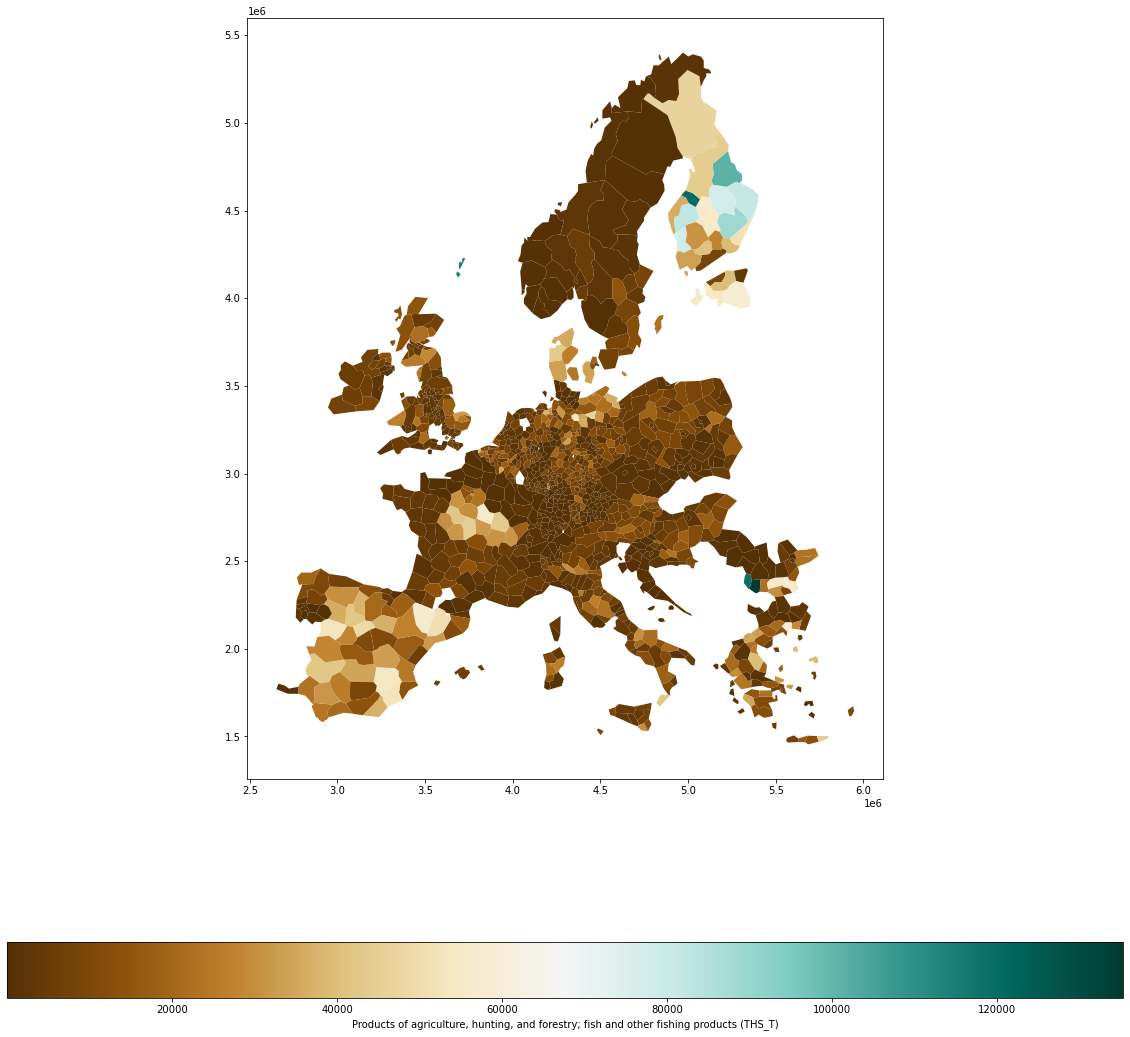

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (20,20))
gdf_select.plot(column = '2019', 
          ax = ax, 
          legend=True,
         legend_kwds = {'label': 'Products of agriculture, hunting, and forestry; fish and other fishing products (THS_T)',
                        'orientation': "horizontal"},
         cmap = 'BrBG',
         
         )
        

# Calculating Energy consumption of Transport fleet

Calculating the share that each region has compared to its national transport 

In [30]:
#load national transport amount with NUTS 3 regions, take average of un- loading, sum up total transport
df_average_transport_total_EC = df_unloading_nuts3.add(df_loading_nuts3).div(2)
df_average_transport_total_EC = df_average_transport_total_EC.set_index(gdf.set_index('CNTR_CODE').index.rename('country'), append=True)
sum_total_national_transport = df_average_transport_total_EC.groupby('country').sum()

In [31]:
df_average_transport_total_EC.iloc[1320:1522]

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
UKH25,UK,6905.5,6347.0,6146.0,7611.0,8662.5,6463.0,5062.0,9614.0,NaN,NaN,NaN,NaN
UKH31,UK,1801.0,721.0,435.5,1118.5,530.5,1480.5,1016.5,732.0,713.5,1004.0,826.5,1082.5
UKH32,UK,25947.5,25773.0,21504.5,27454.0,21428.0,15625.5,19223.0,19511.5,28540.0,24604.5,18238.0,26465.0
UKH34,UK,7874.5,9607.5,7725.0,5770.5,6262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH35,UK,6341.0,5087.0,6735.0,7111.5,6451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,8230.0,7594.0,6323.0,8149.5,5257.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH17,UK,7337.0,9184.0,9038.5,12646.0,9626.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH21,UK,2770.0,2196.0,2311.0,2416.5,1317.0,1453.5,1216.5,1337.0,1936.5,2065.5,3413.5,1993.5


In [32]:
#test if the tables are summed up correctly
test = df_average_transport_total_EC.xs('UK', level='country')
test.sum()

2019     1453669.5
2018     1408268.5
2017     1260223.5
2016     1288953.0
2015     1307366.5
2014      913905.5
2013      924387.0
2012      995509.0
2011      838530.0
2010      873381.0
2009      833711.0
2008      987731.5
dtype: float64

In [33]:
sum_total_national_transport

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
country,,,,,,,,,,,,
AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT,377402.0,367527.5,360241.0,350227.0,325651.0,323233.5,300228.5,305378.5,313114.5,299971.5,303059.0,332079.0
BE,229611.0,233204.5,238837.5,233722.0,234554.0,250709.5,248857.0,239135.0,233721.0,237050.0,233592.0,249626.5
BG,97573.5,121892.5,119698.0,114631.0,134360.5,134264.0,138756.0,122173.0,121627.5,118090.5,136857.0,168592.5
CH,289299.0,283433.5,281639.0,274094.0,278494.0,290786.0,283820.0,287500.0,287909.0,269302.0,270984.5,275411.0
CY,29333.0,29280.0,25569.0,19661.0,14384.0,14569.0,16099.0,22941.0,26018.0,32216.0,28493.0,41601.0
CZ,475527.0,446685.5,418791.0,383311.5,375350.0,324080.5,289114.0,281340.0,288522.5,301390.0,324977.5,382382.5
DE,3093879.0,3078252.5,3022419.0,2969829.5,2894485.0,2848168.0,2737923.0,2686772.0,2495777.0,2274422.0,2299569.5,2547768.0
DK,162569.0,162033.0,174017.5,178672.5,175130.5,171258.5,165531.5,167193.0,169413.0,156751.0,137872.0,179252.0


In [34]:
#calculates the share that each region has of the total goods transported in the country and tests if it has been calculated correctly (assert if sum of all shares = 1 rounded to two decimals)
share_total_national_transport_region = df_average_transport_total_EC.divide(sum_total_national_transport, level = 'country')
test = share_total_national_transport_region.sum(level='country', min_count=1)
test.columns = test.columns.astype(int) #  test.columns.str.strip()
assert (test[2019].dropna().round(2) == 1.00).all()

In [35]:
share_total_national_transport_region

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
CZ052,CZ,0.064279,0.054079,0.053354,0.060268,0.056646,0.050714,0.053494,0.050371,0.061567,0.042337,0.052482,0.047574
CZ053,CZ,0.057333,0.040995,0.047622,0.053226,0.051681,0.051122,0.051582,0.044601,0.049842,0.045347,0.049988,0.051003
CZ063,CZ,0.046840,0.060562,0.047191,0.055554,0.051753,0.049812,0.045072,0.037080,0.046558,0.050990,0.057999,0.053330
CZ064,CZ,0.104410,0.106527,0.104341,0.100842,0.107433,0.110355,0.101308,0.092257,0.090275,0.093213,0.096997,0.104401
CZ071,CZ,0.076863,0.076764,0.066987,0.066376,0.066390,0.079033,0.059738,0.082032,0.069074,0.062260,0.074907,0.063158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,0.005662,0.005392,0.005017,0.006323,0.004021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH17,UK,0.005047,0.006521,0.007172,0.009811,0.007363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH21,UK,0.001906,0.001559,0.001834,0.001875,0.001007,0.001590,0.001316,0.001343,0.002309,0.002365,0.004094,0.002018


In [36]:
share_total_national_transport_region_filledna = share_total_national_transport_region.interpolate(method ='linear', axis = 1, limit_direction ='backward')
share_total_national_transport_region_filledna

,,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
id,country,,,,,,,,,,,,
CZ052,CZ,0.064279,0.054079,0.053354,0.060268,0.056646,0.050714,0.053494,0.050371,0.061567,0.042337,0.052482,0.047574
CZ053,CZ,0.057333,0.040995,0.047622,0.053226,0.051681,0.051122,0.051582,0.044601,0.049842,0.045347,0.049988,0.051003
CZ063,CZ,0.046840,0.060562,0.047191,0.055554,0.051753,0.049812,0.045072,0.037080,0.046558,0.050990,0.057999,0.053330
CZ064,CZ,0.104410,0.106527,0.104341,0.100842,0.107433,0.110355,0.101308,0.092257,0.090275,0.093213,0.096997,0.104401
CZ071,CZ,0.076863,0.076764,0.066987,0.066376,0.066390,0.079033,0.059738,0.082032,0.069074,0.062260,0.074907,0.063158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,0.005662,0.005392,0.005017,0.006323,0.004021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH17,UK,0.005047,0.006521,0.007172,0.009811,0.007363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH21,UK,0.001906,0.001559,0.001834,0.001875,0.001007,0.001590,0.001316,0.001343,0.002309,0.002365,0.004094,0.002018


1. Try to calculate enrgy consumption of transport fleet
international transport (country, (THS_t)) + national transport (country, (THS_t)) = total transport (THS_t)
Mio_Tkm of total transport (country) / total transport (THS_t) = km driven total transport (Country, (THS_km))
km driven total transport (Country, (THS_km)) * share of transport of each region (region) = km driven each region (THS_km)
km driven each region (THS_km) * energy consumption per km = Energy consumtion of transport (MWh)

In [37]:
#loading international transport dataset
df_unloading_int_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ia_ugtt.tsv.gz',['Type_of_carriage', 'Region', 'subsector', 'unit', 'country'])
df_loading_int_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ia_lgtt.tsv.gz',['Type_of_carriage', 'Region', 'subsector', 'unit', 'country'])
#filtering dataset to proper data
df_unloading_int_EC = df_unloading_int_EC.loc[('TOT', 'WORLD', 'TOTAL')]
df_unloading_int_EC = df_unloading_int_EC.droplevel(0)
df_loading_int_EC = df_loading_int_EC.loc[('TOT', 'WORLD', 'TOTAL')]
df_loading_int_EC = df_loading_int_EC.droplevel(0)
#average of loaning and unloading
df_average_transport_total_int_EC = pd.concat((df_loading_int_EC, df_unloading_int_EC))
df_average_transport_total_int_EC = df_average_transport_total_int_EC.groupby(df_average_transport_total_int_EC.index).mean()
df_average_transport_total_int_EC

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
country,,,,,,,,,,,,
AT,9917.5,10505.0,10841.5,10602.5,10228.0,10478.5,10034.0,11545.5,13000.5,12434.5,13583.0,15152.5
BE,21691.0,21912.0,25084.5,23268.0,24790.0,20476.0,21856.0,22092.5,23466.5,24614.5,26847.0,28289.5
BG,3936.0,4904.0,5675.0,6139.0,6145.0,4848.0,5483.5,4492.5,4527.0,3401.5,3223.5,3041.5
CH,5400.5,4046.5,4150.5,4512.5,4674.5,5082.0,4785.5,5584.5,6533.5,5392.5,5505.0,6493.5
CY,14.5,14.5,13.0,10.5,9.0,8.5,11.0,11.5,16.0,15.5,15.0,9.0
CZ,12681.5,14934.0,17784.5,20432.0,24781.0,23080.0,22553.0,20317.0,21474.0,19909.0,16764.5,18799.5
DE,49090.5,52702.5,53574.0,54965.0,53531.5,54960.0,55585.0,56703.0,60667.5,60049.0,61187.0,73419.5
DK,2054.0,2267.0,1932.0,2210.0,1987.5,2364.0,2887.5,3239.5,3202.5,3446.5,4897.5,6452.0
EE,1310.5,1384.0,1577.0,1753.0,1456.0,1620.0,1582.5,1486.0,1689.0,1429.5,1272.0,1971.5


In [38]:
#loading and filtering MIO_Tkm dataset 
df_total_transport_mio_Tkm_country_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ta_tott.tsv.gz',[ 'Type_of_carriage', 'Type_of operation', 'unit', 'country'])
df_total_transport_mio_Tkm_country_EC = df_total_transport_mio_Tkm_country_EC.loc[('TOT', 'TOTAL', 'MIO_TKM')]
df_total_transport_mio_Tkm_country_EC = df_total_transport_mio_Tkm_country_EC.drop(['EU15', 'EU25', 'EU27_2007', 'EU27_2020', 'EU28', 'LI'])
df_total_transport_mio_Tkm_country_EC

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
country,,,,,,,,,,,,,,,,,,,,,
AT,26444.0,25763.0,25978.0,26138.0,25458.0,25260.0,24213.0,26089.0,28542.0,28659.0,...,34313.0,37402.0,39187.0,37044.0,39186.0,39557.0,38498.0,37532.0,35122.0,33981.0
BE,34829.0,32685.0,34220.0,35192.0,36078.0,31808.0,32796.0,32105.0,33107.0,35002.0,...,38356.0,42085.0,43017.0,43847.0,47878.0,50542.0,52889.0,53182.0,51047.0,37284.0
BG,20551.0,NaN,35150.0,NaN,32297.0,NaN,27097.0,NaN,21214.0,19433.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH,NaN,NaN,11947.0,NaN,12441.0,NaN,12817.0,12966.0,13567.0,NaN,...,13911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CY,858.0,892.0,826.0,703.0,563.0,538.0,634.0,896.0,941.0,1087.0,...,1308.0,1202.0,1165.0,1393.0,1119.0,1401.0,NaN,NaN,NaN,NaN
CZ,NaN,NaN,NaN,50315.0,58715.0,54092.0,54893.0,51228.0,54830.0,51832.0,...,50877.0,48141.0,NaN,NaN,46011.0,NaN,NaN,39067.0,37310.0,NaN
DE,311875.0,316772.0,313149.0,315774.0,314816.0,310142.0,305744.0,307009.0,323833.0,313104.0,...,341532.0,343447.0,330016.0,310103.0,303752.0,290745.0,285214.0,288964.0,280708.0,278427.0
DK,14991.0,14998.0,15502.0,16094.0,15500.0,16184.0,NaN,16679.0,16120.0,15018.0,...,NaN,NaN,21254.0,NaN,NaN,NaN,22516.0,NaN,24021.0,23236.0
EE,4794.0,5775.0,NaN,6716.0,NaN,6310.0,5986.0,5791.0,5912.0,NaN,...,7354.0,6417.0,NaN,NaN,NaN,3974.0,NaN,NaN,NaN,NaN


In [39]:
#sum of int + national transport on country level, devide mio Tkm per country by the THS_t transport per country and multipy that with the share of transport per region
total_national_international_transport_country_test = pd.concat((df_average_transport_total_int_EC, sum_total_national_transport))
total_national_international_transport_country_test = total_national_international_transport_country_test.groupby('country').sum()
km_driven_country = df_total_transport_mio_Tkm_country_EC.divide(total_national_international_transport_country_test)
km_driven_region_test = share_total_national_transport_region.multiply(km_driven_country)
km_driven_region_test.sum(level = 'country') 

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
CZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126818,...,0.161320,0.176873,0.169822,0.176127,0.155813,0.146739,0.124621,0.000000,0.000000,0.000000
DE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.130297,...,0.134122,0.126673,0.111905,0.109448,0.106830,0.106789,0.104395,0.101804,0.101174,0.099229
AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098819,...,0.091736,0.087521,0.082319,0.078040,0.075694,0.075795,0.072439,0.070006,0.068150,0.068274
BE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138013,...,0.133767,0.128727,0.122901,0.121147,0.117292,0.139113,0.136939,0.129660,0.128118,0.138594
BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.159953,0.168159,0.000000,0.187861,0.000000,0.229863,0.000000,0.280363,0.000000,0.202454
CH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049346,...,0.000000,0.046077,0.044240,0.044410,0.000000,0.043935,0.000000,0.041803,0.000000,0.000000
CY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031435,...,0.033725,0.036145,0.039037,0.039354,0.036906,0.039116,0.035737,0.032288,0.030449,0.029236
EL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.490134,...,0.607063,0.000000,0.000000,0.462947,0.564312,0.047247,0.049967,0.073826,0.082092,0.080670


In [40]:
total_national_international_transport_country_test

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
country,,,,,,,,,,,,
AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT,387319.5,378032.5,371082.5,360829.5,335879.0,333712.0,310262.5,316924.0,326115.0,312406.0,316642.0,347231.5
BE,251302.0,255116.5,263922.0,256990.0,259344.0,271185.5,270713.0,261227.5,257187.5,261664.5,260439.0,277916.0
BG,101509.5,126796.5,125373.0,120770.0,140505.5,139112.0,144239.5,126665.5,126154.5,121492.0,140080.5,171634.0
CH,294699.5,287480.0,285789.5,278606.5,283168.5,295868.0,288605.5,293084.5,294442.5,274694.5,276489.5,281904.5
CY,29347.5,29294.5,25582.0,19671.5,14393.0,14577.5,16110.0,22952.5,26034.0,32231.5,28508.0,41610.0
CZ,488208.5,461619.5,436575.5,403743.5,400131.0,347160.5,311667.0,301657.0,309996.5,321299.0,341742.0,401182.0
DE,3142969.5,3130955.0,3075993.0,3024794.5,2948016.5,2903128.0,2793508.0,2743475.0,2556444.5,2334471.0,2360756.5,2621187.5
DK,164623.0,164300.0,175949.5,180882.5,177118.0,173622.5,168419.0,170432.5,172615.5,160197.5,142769.5,185704.0


In [41]:
km_driven_region_test

,,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
id,country,,,,,,,,,,,,,,,,,,,,,
CZ052,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006033,...,0.006830,0.010890,0.008554,0.009422,0.007902,0.008312,0.007511,NaN,NaN,NaN
CZ053,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006468,...,0.007315,0.008816,0.007574,0.009085,0.007965,0.007584,0.006633,NaN,NaN,NaN
CZ063,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006763,...,0.008226,0.008235,0.006297,0.007938,0.007761,0.007594,0.006923,NaN,NaN,NaN
CZ064,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013240,...,0.015037,0.015967,0.015667,0.017843,0.017195,0.015765,0.012567,NaN,NaN,NaN
CZ071,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008010,...,0.010044,0.012217,0.013931,0.010521,0.012314,0.009742,0.008272,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000757,NaN,0.000607,0.000623
UKH17,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.001174,NaN,0.000734,0.000556
UKH21,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000325,...,NaN,NaN,0.000202,0.000197,0.000233,NaN,0.000224,NaN,0.000175,0.000210


2. Try to calculate energy consumption of vehicle fleet
Million vehivle-kilometers * energy consumption per kilometer * share of each region = energyconsumtion of fleet

In [42]:
df_total_transport_mio_Vkm_country_2 = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ta_tott.tsv.gz',[ 'Type_of_carriage', 'Type_of operation', 'unit', 'country'])
df_total_transport_mio_Vkm_country_2 = df_total_transport_mio_Vkm_country_2.loc[('TOT', 'TOTAL', 'MIO_VKM')]
df_total_transport_mio_Vkm_country_2 = df_total_transport_mio_Vkm_country_2.drop(['EU15', 'EU25', 'EU27_2007', 'EU27_2020', 'EU28', 'LI'])
df_total_transport_mio_Vkm_country_2.columns = df_total_transport_mio_Vkm_country_2.columns.astype(int)
df_total_transport_mio_Vkm_country_2

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
country,,,,,,,,,,,,,,,,,,,,,
AT,2713.0,2678.0,2671.0,2643.0,2573.0,2500.0,2411.0,2512.0,2690.0,2709.0,...,3154.0,3327.0,3391.0,3137.0,3268.0,3328.0,3235.0,3218.0,3087.0,3057.0
BE,2807.0,2554.0,2774.0,2728.0,2850.0,2373.0,2378.0,2326.0,2392.0,2478.0,...,2678.0,3173.0,3419.0,3355.0,3755.0,3869.0,4208.0,4316.0,4034.0,3103.0
BG,1634.0,NaN,2737.0,NaN,2653.0,NaN,2380.0,NaN,2060.0,1944.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH,NaN,NaN,1865.0,NaN,1875.0,NaN,1912.0,1918.0,1968.0,NaN,...,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CY,146.0,142.0,134.0,119.0,96.0,89.0,102.0,137.0,151.0,150.0,...,210.0,161.0,155.0,196.0,143.0,206.0,NaN,NaN,NaN,NaN
CZ,NaN,NaN,NaN,5114.0,5527.0,5138.0,5056.0,4788.0,5028.0,4876.0,...,5364.0,5279.0,NaN,NaN,5495.0,NaN,NaN,5267.0,6218.0,NaN
DE,30110.0,30416.0,30123.0,30237.0,30083.0,29582.0,29009.0,29106.0,30347.0,29295.0,...,31787.0,31460.0,30243.0,28853.0,28792.0,27911.0,28025.0,29030.0,28734.0,28796.0
DK,1475.0,1465.0,1494.0,1556.0,1575.0,1636.0,NaN,1691.0,1697.0,1692.0,...,NaN,NaN,2210.0,NaN,NaN,NaN,2324.0,NaN,2387.0,2347.0
EE,357.0,417.0,NaN,495.0,NaN,456.0,464.0,438.0,451.0,NaN,...,603.0,537.0,NaN,NaN,NaN,527.0,NaN,NaN,NaN,NaN


In [43]:
df_total_transport_mio_Vkm_country_2_filledna = df_total_transport_mio_Vkm_country_2.interpolate(method ='linear', axis = 1)
df_total_transport_mio_Vkm_country_2_filledna

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
country,,,,,,,,,,,,,,,,,,,,,
AT,2713.0,2678.000000,2671.000000,2643.000000,2573.000000,2500.000000,2411.000000,2512.000000,2690.000000,2709.000000,...,3154.000000,3327.000000,3391.000000,3137.000000,3268.000000,3328.000000,3235.0,3218.0,3087.0,3057.0
BE,2807.0,2554.000000,2774.000000,2728.000000,2850.000000,2373.000000,2378.000000,2326.000000,2392.000000,2478.000000,...,2678.000000,3173.000000,3419.000000,3355.000000,3755.000000,3869.000000,4208.0,4316.0,4034.0,3103.0
BG,1634.0,2185.500000,2737.000000,2695.000000,2653.000000,2516.500000,2380.000000,2220.000000,2060.000000,1944.000000,...,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.0,1944.0,1944.0,1944.0
CH,NaN,NaN,1865.000000,1870.000000,1875.000000,1893.500000,1912.000000,1918.000000,1968.000000,1972.000000,...,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.0,1980.0,1980.0,1980.0
CY,146.0,142.000000,134.000000,119.000000,96.000000,89.000000,102.000000,137.000000,151.000000,150.000000,...,210.000000,161.000000,155.000000,196.000000,143.000000,206.000000,206.0,206.0,206.0,206.0
CZ,NaN,NaN,NaN,5114.000000,5527.000000,5138.000000,5056.000000,4788.000000,5028.000000,4876.000000,...,5364.000000,5279.000000,5351.000000,5423.000000,5495.000000,5419.000000,5343.0,5267.0,6218.0,6218.0
DE,30110.0,30416.000000,30123.000000,30237.000000,30083.000000,29582.000000,29009.000000,29106.000000,30347.000000,29295.000000,...,31787.000000,31460.000000,30243.000000,28853.000000,28792.000000,27911.000000,28025.0,29030.0,28734.0,28796.0
DK,1475.0,1465.000000,1494.000000,1556.000000,1575.000000,1636.000000,1663.500000,1691.000000,1697.000000,1692.000000,...,1978.666667,2094.333333,2210.000000,2238.500000,2267.000000,2295.500000,2324.0,2355.5,2387.0,2347.0
EE,357.0,417.000000,456.000000,495.000000,475.500000,456.000000,464.000000,438.000000,451.000000,442.000000,...,603.000000,537.000000,534.500000,532.000000,529.500000,527.000000,527.0,527.0,527.0,527.0


In [44]:
toe = pd.read_excel('C:/Users/seanp/python/anaconda3/envs/python_backup/my_python_work/Data/Summary_Vehicles_Fuels.xlsx', sheet_name = 'fuel_consumption_model_kopie')
toe = toe.set_index('country')
toe = toe.drop(columns=['Type'])
toe.columns = toe.columns.astype(int)
toe

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
country,,,,,,,,,,,,,,,,,,,,,
UK,41.420,41.860,41.830,41.560,42.200,43.010,42.030,44.340,44.120,46.240,...,35.680560,34.396060,33.157802,31.964121,30.813412,29.704130,28.634781,27.603929,26.610187,25.652221
SK,41.410,37.350,45.390,31.050,32.320,42.310,46.300,46.350,45.290,41.700,...,34.252054,33.018980,31.830296,30.684406,29.579767,28.514895,27.488359,26.498778,25.544822,24.625209
SL,24.880,33.220,33.140,37.060,41.350,46.520,50.520,66.040,92.440,66.860,...,59.965170,57.806424,55.725392,53.719278,51.785384,49.921110,48.123950,46.391488,44.721395,43.111424
SE,52.190,52.260,50.340,52.500,54.700,55.980,56.740,54.750,55.740,54.670,...,38.569674,37.181166,35.842644,34.552309,33.308426,32.109322,30.953387,29.839065,28.764858,27.729324
RO,40.980,54.610,57.830,58.290,48.390,34.840,42.230,36.100,37.800,41.690,...,38.048029,36.678300,35.357881,34.084997,32.857937,31.675051,30.534750,29.435499,28.375821,27.354291
PT,41.530,41.830,40.950,52.530,49.430,44.980,46.180,43.830,45.290,45.980,...,44.355928,42.759114,41.219786,39.735874,38.305383,36.926389,35.597039,34.315545,33.080186,31.889299
PL,14.760,16.790,13.040,19.490,23.740,30.150,35.140,39.810,39.980,39.370,...,20.199723,19.472533,18.771522,18.095747,17.444300,16.816305,16.210918,15.627325,15.064742,14.522411
AT,66.750,76.430,86.340,94.030,91.280,94.160,77.000,72.650,61.680,67.230,...,59.106461,56.978628,54.927398,52.950011,51.043811,49.206234,47.434809,45.727156,44.080978,42.494063
BE,52.230,50.340,50.780,54.080,53.920,54.830,56.550,58.890,61.060,59.460,...,45.792460,44.143931,42.554750,41.022779,39.545959,38.122304,36.749901,35.426905,34.151536,32.922081


In [45]:
toe_mio_Vkm_country = toe.multiply(df_total_transport_mio_Vkm_country_2_filledna)
toe_mio_Vkm_country.columns = toe_mio_Vkm_country.columns.astype(int)
toe_mio_Vkm_country
print(toe_mio_Vkm_country.columns)

Int64Index([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
            2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
           dtype='int64')


In [46]:
toe_mio_Vkm_country.columns = ['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016','2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030']
toe_mio_Vkm_country

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
country,,,,,,,,,,,,,,,,,,,,,
AT,NaN,206057.250,245951.740,279309.90,312931.840,2.983030e+05,2.953799e+05,2.611070e+05,2.417066e+05,1.945387e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BE,NaN,210695.820,217267.440,213682.24,209235.520,2.024696e+05,1.839546e+05,1.933444e+05,1.868580e+05,1.635187e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BG,NaN,75427.200,83844.720,70567.20,93292.560,8.886024e+04,9.807480e+04,8.880192e+04,7.567992e+04,8.401968e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CY,NaN,10950.960,10800.580,10164.04,10112.540,7.606170e+03,9.472680e+03,7.531450e+03,8.021020e+03,1.009050e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ,NaN,250461.040,204570.280,211582.80,237081.250,2.384281e+05,2.443061e+05,2.581322e+05,2.672758e+05,2.795180e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DE,NaN,1426355.760,1321155.300,1259163.25,1207708.970,1.133253e+06,1.084007e+06,1.151956e+06,1.122178e+06,1.086162e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DK,NaN,109229.120,107528.575,108786.44,112502.455,1.189722e+05,1.177451e+05,1.149421e+05,1.094499e+05,9.543109e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EE,NaN,16342.270,35456.560,41880.69,25485.720,2.683506e+04,2.786084e+04,2.738778e+04,2.870802e+04,2.835306e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
share_total_national_transport_region_filledna.columns = share_total_national_transport_region_filledna.columns.str.replace(' ', '')
print(share_total_national_transport_region_filledna.columns)

Index(['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008'],
      dtype='object')


In [49]:
MWh_region = toe_mio_Vkm_country.multiply(share_total_national_transport_region_filledna)
MWh_region

,,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
id,country,,,,,,,,,,,,,,,,,,,,,
CZ052,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13297.816779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ053,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14256.145548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ063,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14906.727245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ064,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29181.878551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ071,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17653.790184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH17,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UKH21,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1888.836898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
MWh_region_filledna = MWh_region.interpolate(method ='linear', axis = 1)
MWh_region_filledna

,,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
id,country,,,,,,,,,,,,,,,,,,,,,
CZ052,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13297.816779,...,14344.762093,14344.762093,14344.762093,14344.762093,14344.762093,14344.762093,14344.762093,14344.762093,14344.762093,14344.762093
CZ053,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14256.145548,...,12668.520929,12668.520929,12668.520929,12668.520929,12668.520929,12668.520929,12668.520929,12668.520929,12668.520929,12668.520929
CZ063,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14906.727245,...,13222.714386,13222.714386,13222.714386,13222.714386,13222.714386,13222.714386,13222.714386,13222.714386,13222.714386,13222.714386
CZ064,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29181.878551,...,24002.009998,24002.009998,24002.009998,24002.009998,24002.009998,24002.009998,24002.009998,24002.009998,24002.009998,24002.009998
CZ071,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17653.790184,...,15798.394458,15798.394458,15798.394458,15798.394458,15798.394458,15798.394458,15798.394458,15798.394458,15798.394458,15798.394458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKH16,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4310.350271,4310.350271,4310.350271,4310.350271,4310.350271,4310.350271,4310.350271,4310.350271,4310.350271,4310.350271
UKH17,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3842.653698,3842.653698,3842.653698,3842.653698,3842.653698,3842.653698,3842.653698,3842.653698,3842.653698,3842.653698
UKH21,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1888.836898,...,1450.749727,1450.749727,1450.749727,1450.749727,1450.749727,1450.749727,1450.749727,1450.749727,1450.749727,1450.749727


<AxesSubplot:>

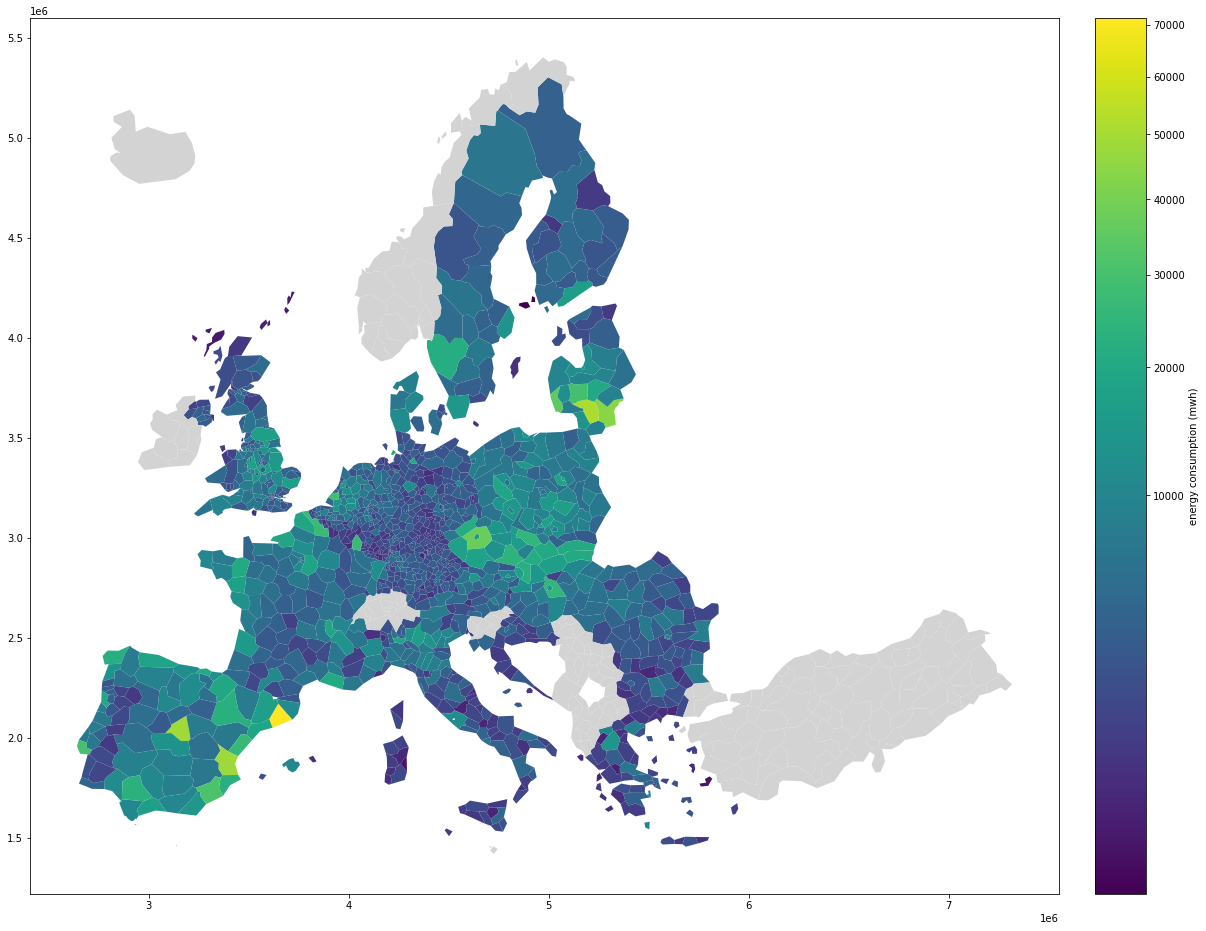

In [93]:
gdf_MWh_region = gdf_dw.join(MWh_region_filledna)
gdf_MWh_region = gdf_MWh_region.drop(['ES708', 'ES704', 'ES705', 'ES709', 'ES706', 'ES703', 'ES707', 'CY000', 'FRY10', 'FRY20', 'FRY30', 'FRY40', 'FRY50', 'PT300', 'PT200'])

fig, ax = plt.subplots(1, 1, figsize = (20,20))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
gdf_MWh_region = gdf_MWh_region.cx[0.22:,1:]

gdf_MWh_region.plot(column = '2019', 
         ax = ax, 
         legend=True,
         cax = cax,
         legend_kwds = {'label': 'energy consumption (mwh)'},
         cmap = 'viridis',
         norm=mcolors.PowerNorm(0.4),
         missing_kwds= dict(color = "lightgrey")
         )

# Test area

<AxesSubplot:>

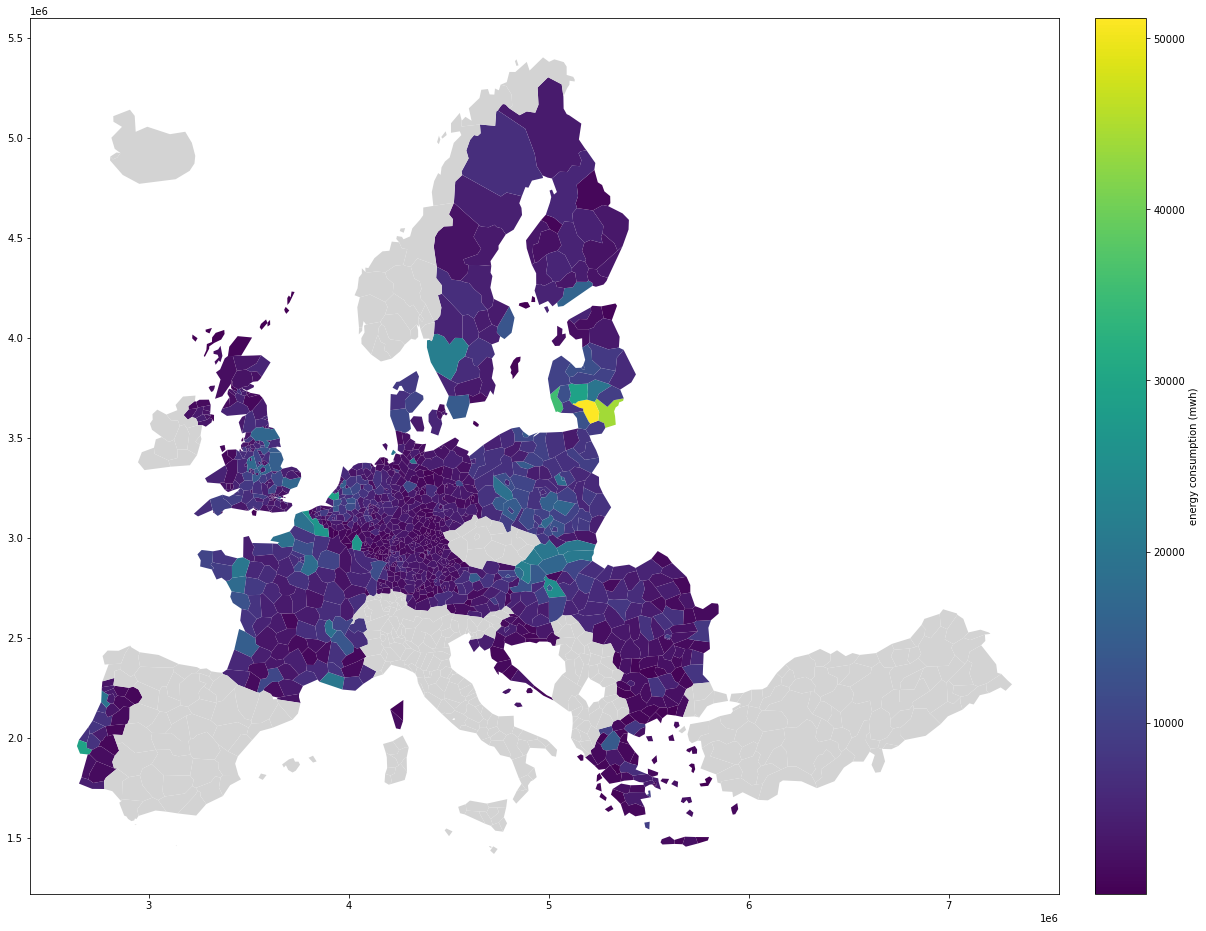

In [87]:
gdf_MWh_region = gdf_dw.join(MWh_region)
gdf_MWh_region = gdf_MWh_region.drop(['ES708', 'ES704', 'ES705', 'ES709', 'ES706', 'ES703', 'ES707', 'CY000', 'FRY10', 'FRY20', 'FRY30', 'FRY40', 'FRY50', 'PT300', 'PT200'])
fig, ax = plt.subplots(1, 1, figsize = (20,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)

gdf_MWh_region.plot(column = '2019', 
         ax = ax, 
         legend=True,
         cax = cax,
         legend_kwds = {'label': 'energy consumption (mwh)'},
         cmap = 'viridis',
         missing_kwds= dict(color = "lightgrey")
         )

In [84]:
maxValuesObj = MWh_region_filledna.max()
pd.set_option("display.max_rows", 50, "display.max_columns", 50)
MWh_region_filledna.loc[(slice(None), 'FR'), :]

,,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
id,country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FRC11,FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5410.381829,6479.118171,6479.118171,6479.118171,6479.118171,6479.118171,6479.118171,6479.118171,6479.118171,6479.118171,6479.118171,6479.118171,6479.118171
FRC12,FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.433315,2771.492926,2771.492926,2771.492926,2771.492926,2771.492926,2771.492926,2771.492926,2771.492926,2771.492926,2771.492926,2771.492926,2771.492926
FRC13,FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7248.771264,6467.841939,6467.841939,6467.841939,6467.841939,6467.841939,6467.841939,6467.841939,6467.841939,6467.841939,6467.841939,6467.841939,6467.841939
FRC14,FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4648.044075,4507.212641,4507.212641,4507.212641,4507.212641,4507.212641,4507.212641,4507.212641,4507.212641,4507.212641,4507.212641,4507.212641,4507.212641
FRC21,FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6195.527317,6881.372138,6881.372138,6881.372138,6881.372138,6881.372138,6881.372138,6881.372138,6881.372138,6881.372138,6881.372138,6881.372138,6881.372138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FRB02,FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4914.421196,5031.659963,5031.659963,5031.659963,5031.659963,5031.659963,5031.659963,5031.659963,5031.659963,5031.659963,5031.659963,5031.659963,5031.659963
FRB03,FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4159.829465,3555.498618,3555.498618,3555.498618,3555.498618,3555.498618,3555.498618,3555.498618,3555.498618,3555.498618,3555.498618,3555.498618,3555.498618
FRB04,FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.164182,5764.410053,5764.410053,5764.410053,5764.410053,5764.410053,5764.410053,5764.410053,5764.410053,5764.410053,5764.410053,5764.410053,5764.410053


gdf_MWh_region_select = gdf_MWh_region.cx[0.22:,1:]

In [ ]:
toe_mio_Vkm_country.columns = toe_mio_Vkm_country.columns.int.replace(' ', '')
print(toe_mio_Vkm_country.columns)

In [ ]:
MWh_region.columns = MWh_region.columns.str.replace(' ', '')
print(MWh_region.columns)

In [ ]:
MWh_region.columns = ['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016','2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030']
MWh_region

In [ ]:
#loading international transport dataset
df_unloading_int_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ia_ugtt.tsv.gz',['Type_of_carriage', 'Region', 'subsector', 'unit', 'country'])
df_loading_int_EC = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ia_lgtt.tsv.gz',['Type_of_carriage', 'Region', 'subsector', 'unit', 'country'])
#filtering dataset to proper data
df_unloading_int_EC = df_unloading_int_EC.loc[('TOT', 'WORLD', 'TOTAL')]
df_unloading_int_EC = df_unloading_int_EC.droplevel(0)
df_loading_int_EC = df_loading_int_EC.loc[('TOT', 'WORLD', 'TOTAL')]
df_loading_int_EC = df_loading_int_EC.droplevel(0)
#average of loaning and unloading
df_average_transport_total_int_EC = pd.concat((df_loading_int_EC, df_unloading_int_EC))
df_average_transport_total_int_EC = df_average_transport_total_int_EC.groupby(df_average_transport_total_int_EC.index).mean()
#multiplay international transport with share of total national tranport for each region
international_transport_region = share_total_national_transport_region.multiply(df_average_transport_total_int_EC)
#sum of national and international transport
df_average_transport_total = df_average_transport_total.droplevel(1)
international_transport_region = international_transport_region.droplevel(1)
total_national_international_transport_region = pd.concat((international_transport_region, df_average_transport_total))
total_national_international_transport_region = total_national_international_transport_region.groupby('id').sum()
total_national_international_transport_region

In [ ]:
international_transport_region

In [ ]:
df_average_transport_total

In [ ]:
#devide total mio vehicle TKM by total transport per region to get km driven by trucks in that region
df_total_transport_mio_Tkm_region_EC = share_total_national_transport_region.multiply(df_total_transport_mio_Tkm_country_EC)
km_driven_region = df_total_transport_mio_Tkm_region_EC.divide(total_national_international_transport_region)
km_driven_region

In [ ]:
df_total_transport_mio_Tkm_region_EC

In [ ]:
df_total_transport_mio_Tkm_region_EC = share_total_national_transport_region.multiply(df_total_transport_mio_Tkm_country_EC)

In [ ]:
test = km_driven_region.iloc[1343:1522]

In [ ]:
print(gdf.iloc[0:5])

In [ ]:
#trying to use different dataset with total transport amount
df_unloading_test = pearson_util.load_eurostat_tsv('https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ta_ru.tsv.gz',['subsector', 'unit', 'region'])

In [ ]:
idx = pd.IndexSlice
df_unloading_test = df_unloading_test.loc[idx[:,'THS_T'], :]
df_unloading_test = df_unloading_test.droplevel('unit')
df_unloading_test

In [ ]:
df_unloading_test = df_unloading_test.reindex(gdf.set_index('id').index)




df_unloading_test = df_unloading_test.loc[idx[:,['THS_T']]]
df_unloading_test = df_unloading_test.droplevel(1)
df_unloading_total = df_unloading.loc['THS_T']
df_unloading_test

In [ ]:
df_unloading_test = df_unloading_test.droplevel(0)

In [ ]:
#sorting gdf according to id so it might aligne with eurostats data
gdf_sort = gdf.sort_values(by=['id'])

In [ ]:
#selecting 2019 column
df_at_2019 = df_average_transport.iloc[:, 0]

In [ ]:
print(df_at_2019.iloc[100:105])

In [ ]:
gdf_sort['TRANSPORT_AMOUNT_2019'] = df_at_2019

In [ ]:
print(gdf_sort.iloc[100:150])

In [ ]:
gdf_sort.head()

In [ ]:
#alinge dataframes and delet all lines with no shared id